# Random Forest(Fraud_check)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [37]:
data=pd.read_csv("Fraud_check (1).csv")

In [38]:
pd.set_option("display.max_rows",None)
data 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [39]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [40]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [41]:
data.shape

(600, 6)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [43]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [44]:
data.describe

<bound method NDFrame.describe of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
5          NO       Divorced           33329           116382   
6          NO       Divorced           83357            80890   
7         YES         Single           62774           131253   
8          NO         Single           83519           102481   
9         YES       Divorced           98152           155482   
10         NO         Single           29732           102602   
11         NO         Single           61063            94875   
12         NO       Divorced           11794           148033   
13         NO        Married           61830            

In [45]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [46]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [47]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [48]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


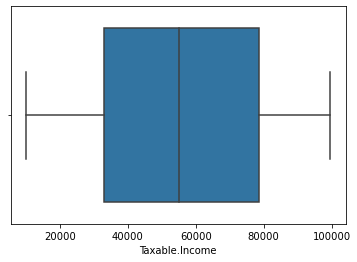

In [49]:
ax = sns.boxplot(data['Taxable.Income'])

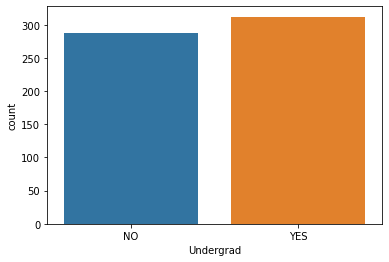

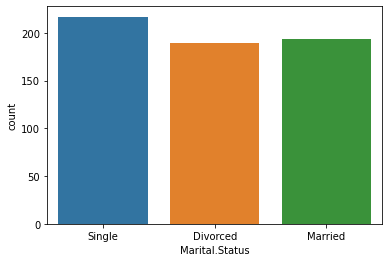

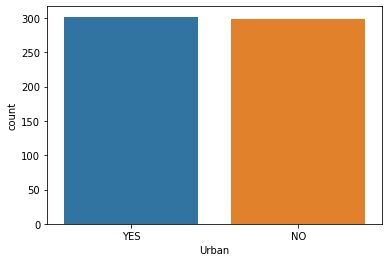

In [50]:
# checking count of categories for categorical columns
sns.countplot(data['Undergrad'])
plt.show()

sns.countplot(data['Marital.Status'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

In [51]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
data['Taxable.Income'] = pd.cut(x=data['Taxable.Income'],bins=[0,30000,100000], labels=['risky','good'], right = False)
data 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
5,NO,Divorced,good,116382,0,NO
6,NO,Divorced,good,80890,8,YES
7,YES,Single,good,131253,3,YES
8,NO,Single,good,102481,12,YES
9,YES,Divorced,good,155482,4,YES


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

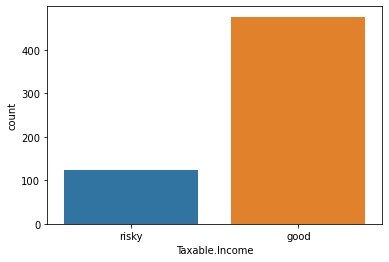

In [52]:
sns.countplot(data['Taxable.Income'])

In [53]:
data['Taxable.Income'].value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

In [54]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,good,50047,10,1
1,1,0,good,134075,18,1
2,0,1,good,160205,30,1
3,1,2,good,193264,15,1
4,0,1,good,27533,28,0
5,0,0,good,116382,0,0
6,0,0,good,80890,8,1
7,1,2,good,131253,3,1
8,0,2,good,102481,12,1
9,1,0,good,155482,4,1


In [55]:
data.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000


In [56]:
# dropping column taxable_income
data1 = data.drop('Taxable.Income', axis = 1)
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
5,0,0,116382,0,0
6,0,0,80890,8,1
7,1,2,131253,3,1
8,0,2,102481,12,1
9,1,0,155482,4,1


In [57]:
# Dividing data into independent variables and dependent variable
x = data1.iloc[:,0:]
y = data['Taxable.Income']

In [58]:
x 

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
5,0,0,116382,0,0
6,0,0,80890,8,1
7,1,2,131253,3,1
8,0,2,102481,12,1
9,1,0,155482,4,1


In [59]:
y 

0       good
1       good
2       good
3       good
4       good
5       good
6       good
7       good
8       good
9       good
10     risky
11      good
12     risky
13      good
14      good
15      good
16     risky
17      good
18      good
19     risky
20      good
21     risky
22      good
23      good
24      good
25      good
26      good
27      good
28     risky
29      good
30      good
31      good
32      good
33      good
34     risky
35      good
36     risky
37      good
38     risky
39      good
40      good
41      good
42      good
43      good
44      good
45      good
46      good
47      good
48     risky
49      good
50      good
51      good
52      good
53     risky
54      good
55     risky
56      good
57      good
58     risky
59      good
60      good
61     risky
62      good
63      good
64      good
65      good
66      good
67      good
68     risky
69      good
70      good
71      good
72      good
73      good
74      good
75      good
76      good

In [60]:
# Splitting data into training to 80% and testing to 20% in data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [61]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
332,1,0,84132,1,0
13,0,1,86649,16,1
274,1,1,112584,25,0
257,1,1,31611,17,1
112,1,2,193038,26,1
558,0,0,191139,12,1
281,0,2,167403,7,1
388,1,0,151636,4,1
45,1,1,183095,14,1
47,1,2,34964,2,0


In [62]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
16,1,0,34551,29,0
330,0,1,43176,29,0
433,0,1,129265,14,1
333,1,2,44775,13,1
43,1,0,50020,10,0


In [63]:
y_train

332     good
13      good
274     good
257     good
112     good
558     good
281     good
388     good
45      good
47      good
9       good
196    risky
445     good
140    risky
66      good
410     good
225     good
277     good
98     risky
135    risky
275     good
547     good
133     good
569     good
237    risky
350     good
168    risky
372     good
576     good
366     good
385     good
483    risky
419     good
334     good
363    risky
328     good
480     good
172    risky
192     good
20      good
536     good
213     good
147     good
490     good
194    risky
218     good
413     good
342     good
157     good
252     good
259    risky
464     good
44      good
381     good
452     good
221     good
390     good
530     good
232    risky
139     good
3       good
149     good
212     good
585     good
524    risky
143    risky
197     good
163    risky
222     good
4       good
358     good
104     good
520     good
78      good
380     good
199    risky
101     good

In [64]:
y_test

159     good
307     good
253     good
528     good
137    risky
16     risky
330     good
433    risky
333    risky
43      good
120     good
110    risky
118    risky
42      good
591    risky
12     risky
200     good
508     good
71      good
295     good
552     good
106    risky
355     good
15      good
283     good
522     good
566     good
588     good
426     good
291     good
319     good
589     good
374     good
538     good
51      good
169     good
177     good
261     good
84      good
26      good
449     good
457    risky
320     good
243     good
476     good
144     good
161     good
0       good
188    risky
223     good
580     good
256     good
368     good
269     good
203     good
202     good
336     good
77      good
217     good
396     good
473     good
14      good
471    risky
356    risky
549     good
185     good
195     good
323     good
561     good
209     good
467     good
544    risky
416     good
233    risky
293     good
309     good
563     good

## Random Forest Classification

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 'auto'
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [66]:
# Train the model on training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [67]:
kfold = KFold(n_splits=10)

results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7458333333333333


## Bagged Decision Trees for Classification

In [68]:
from sklearn.ensemble import BaggingClassifier

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7416666666666666


## AdaBoost Classification

In [69]:
from sklearn.ensemble import AdaBoostClassifier

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=10)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.8


## Stacking Ensemble for Classification

In [70]:
# Stacking Ensemble for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10, random_state=7 , shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7933333333333332
